# **TikTok User Verification Prediction: A Logistic Regression Approach**


Introduction

In recent years, social media platforms like TikTok have become major channels for sharing information, opinions, and entertainment. With millions of videos uploaded daily, distinguishing between factual claims and personal opinions has become a pressing challenge for both platform moderation and user experience.

TikTok receives a large volume of user reports regarding misleading or harmful content. However, reviewing all reported videos manually creates a significant backlog. To improve efficiency, data-driven models can assist by automatically identifying whether a video is more likely to contain a claim or an opinion. Such models can help prioritize reported content, ensuring that potentially harmful claims are addressed more quickly.

In this project, we take an important intermediate step: building a logistic regression model to explore the relationship between user and video features and the probability that an account is verified. Earlier analysis indicated that verified accounts are more likely to post opinions than claims. By modeling verified status, we can better understand the user characteristics that drive content patterns.

🔹 Project Goals

Perform Exploratory Data Analysis (EDA) to investigate patterns and check modeling assumptions.

Build and evaluate a logistic regression model using verified status as the target variable.

Interpret model coefficients to identify which video/user features are most associated with verified users.

Translate analytical insights into business recommendations that support TikTok’s moderation strategies.

🔹 Why This Matters

This project highlights the role of data science in content moderation. By combining machine learning with thoughtful feature analysis, platforms like TikTok can:

Reduce manual workload by automatically flagging and prioritizing videos.

Enhance user trust by quickly responding to misleading claims.

Gain insights into verified users’ behavior, which often shapes the spread of content.

### Imports and loading
I imported the data and packages were neethded for building regression models.

In [21]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Load the TikTok dataset.


In [75]:
data = pd.read_csv("tiktok_dataset.csv")

The purposes of EDA before constructing our logistic regression model were (1) to identify data anomalies such as outliers and class imbalance that might have affected the modeling, and (2) to verify model assumptions such as the absence of severe multicollinearity.

### **Task 2a. Explore data with EDA**

Analyzed the data and check for and handle missing values and duplicates.

In [76]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Got the number of rows and columns in the dataset.

In [22]:
data.shape

(19382, 12)

Got the data types of the columns.

In [23]:
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generated basic descriptive statistics about the dataset.

In [28]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9542.500000,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5509.220604,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Checked for and handle missing values.

In [27]:
data.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [26]:
data = data.dropna(axis=0)

In [29]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Checked for and handle duplicates.

In [30]:
data.duplicated().sum()

0

Checked for and handle outliers.

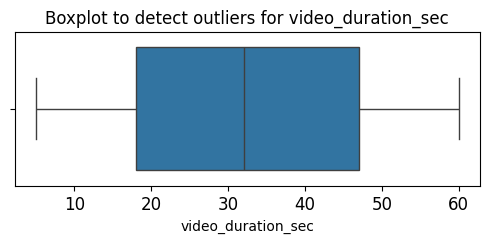

In [31]:
# Created a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_duration_sec', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_duration_sec'])
plt.show()

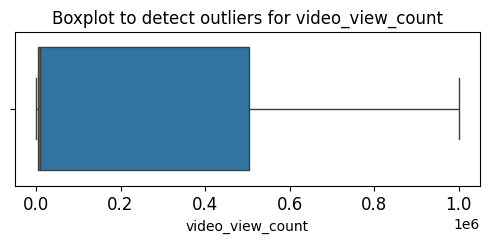

In [32]:
# Created a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_view_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_view_count'])
plt.show()

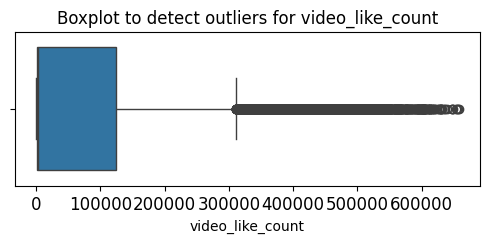

In [33]:
# Created a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_like_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_like_count'])
plt.show()

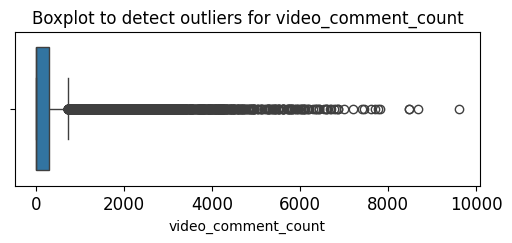

In [34]:
# Created a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_comment_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_comment_count'])
plt.show()

In [ ]:
# Checked for and handle outliers
percentile25 = data["video_like_count"].quantile(0.25)
percentile75 = data["video_like_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

data.loc[data["video_like_count"] > upper_limit, "video_like_count"] = upper_limit

In [40]:
# Checked for and handle outliers

percentile25 = data["video_comment_count"].quantile(0.25)
percentile75 = data["video_comment_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

data.loc[data["video_comment_count"] > upper_limit, "video_comment_count"] = upper_limit

Check class balance of the target variable. Remember, the goal is to predict whether the user of a given post is verified or unverified.

In [41]:
data["verified_status"].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

Approximately 93.7% of the dataset represents videos posted by unverified accounts and 6.3% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [44]:
# Identify data points from majority and minority classes
data_majority = data[data["verified_status"] == "not verified"]
data_minority = data[data["verified_status"] == "verified"]

# Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 
                                 n_samples=len(data_majority), 
                                 random_state=0)              

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

data_upsampled["verified_status"].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

Got the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [43]:
# Got the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


Extracted the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [46]:
data_upsampled["text_length"] = data_upsampled["video_transcription_text"].apply(func=lambda text: len(text))

In [47]:
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualized the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

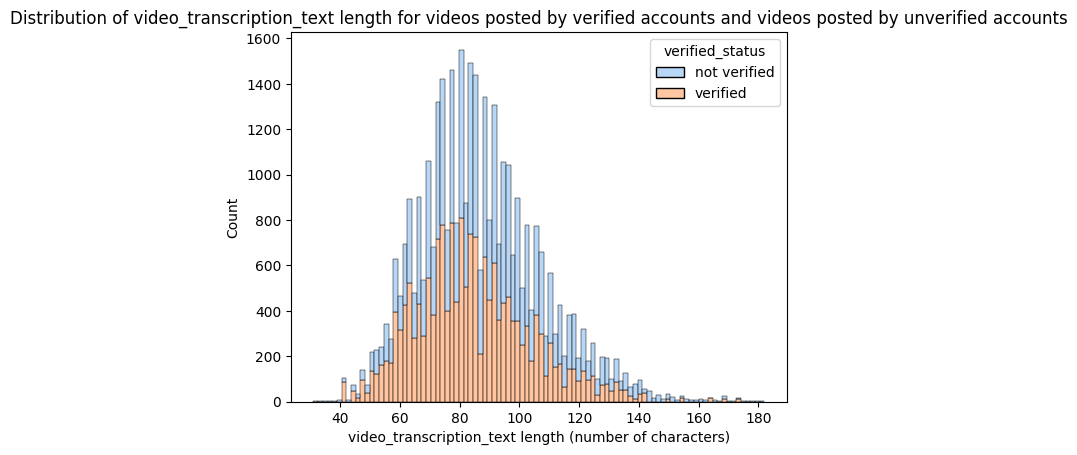

In [77]:
sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="text_length", kde=False, palette="pastel", 
             hue="verified_status", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()

### **Task 2b. Examine correlations**

In [78]:
data_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.626385,-0.504015,-0.487096,-0.608773,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005993,0.010515,0.008753,0.012674,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.244693
video_like_count,-0.626385,0.005993,0.004494,0.856937,1.000000,0.832146,0.805543,0.818032,0.216693
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.805543,0.710117,1.000000,0.793668,0.173396
video_comment_count,-0.608773,0.012674,-0.001086,0.748361,0.818032,0.671335,0.793668,1.000000,0.217661
text_length,-0.193677,-0.007083,-0.002981,0.244693,0.216693,0.171651,0.173396,0.217661,1.000000


Visualized a correlation heatmap of the data.

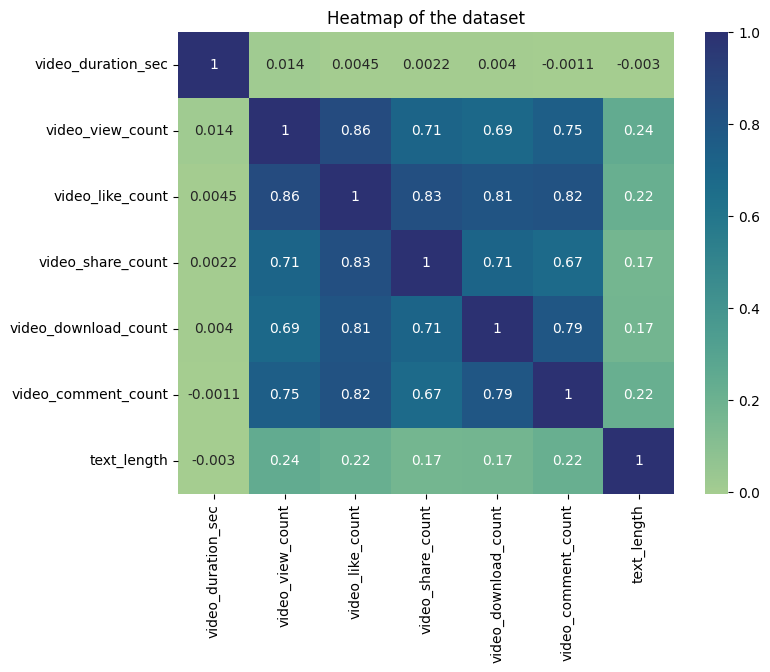

In [79]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", 
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]]
    .corr(numeric_only=True), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.



##  Construct



### **Task 3a. Select variables**

Selected the outcome variable.

In [52]:
y = data_upsampled["verified_status"]

Select the features.

In [80]:
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]


X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


### **Task 3b. Train-test split**

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [82]:
# Got shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

### **Task 3c. Encode variables**

Checked the data types of the features.

In [83]:
X_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [84]:
X_train["claim_status"].unique()

array(['opinion', 'claim'], dtype=object)

In [85]:
X_train["author_ban_status"].unique()

array(['active', 'under review', 'banned'], dtype=object)

Encode categorical features in the training set using an appropriate method.

In [86]:
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]

X_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [87]:
X_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [88]:
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [89]:
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [90]:
X_train_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [91]:
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())


X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [92]:
X_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
33058,33,2252.0,23.0,4.0,0.0
20491,52,6664.0,550.0,53.0,2.0
25583,37,6327.0,257.0,3.0,0.0
18474,57,1702.0,28.0,0.0,0.0
27312,21,3842.0,101.0,1.0,0.0


In [93]:
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,4.0,0.0,1.0,0.0,0.0
1,52,6664.0,550.0,53.0,2.0,1.0,0.0,0.0
2,37,6327.0,257.0,3.0,0.0,1.0,0.0,0.0
3,57,1702.0,28.0,0.0,0.0,1.0,0.0,0.0
4,21,3842.0,101.0,1.0,0.0,1.0,0.0,0.0


Check the data type of the outcome variable.

In [94]:
y_train.dtype

dtype('O')

In [95]:
y_train.unique()

array(['verified', 'not verified'], dtype=object)

Encode categorical values of the outcome variable the training set using an appropriate method.

In [96]:
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [97]:
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

y_train_final

array([1., 1., 1., ..., 1., 1., 0.])

### **Task 3d. Model building**

Constructed a model and fit it to the training set.

In [98]:
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)



## Execute


### Results and evaluation


Encoded categorical features in the testing set using an appropriate method.

In [105]:
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]

X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [106]:
X_test_encoded = X_encoder.transform(X_test_to_encode)

X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [107]:
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [108]:
X_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
21061,41,2118.0,57.0,5.0,2.0
31748,27,5701.0,157.0,1.0,0.0
20197,31,449767.0,75385.0,5956.0,728.5
5727,19,792813.0,56597.0,5146.0,728.5
11607,54,2044.0,68.0,19.0,2.0


In [109]:
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,0.0,1.0,0.0,0.0
2,31,449767.0,75385.0,5956.0,728.5,0.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,728.5,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0


Tested the logistic regression model. Use the model to make predictions on the encoded testing set.

In [110]:
y_pred = log_clf.predict(X_test_final)

Display the predictions on the encoded testing set.

In [111]:
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

Display the true labels of the testing set.

In [112]:
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [113]:
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

In [114]:
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((26826, 8), (26826,), (8942, 8), (8942,))

### **Task 4b. Visualize model results**

Created a confusion matrix to visualize the results of the logistic regression model.

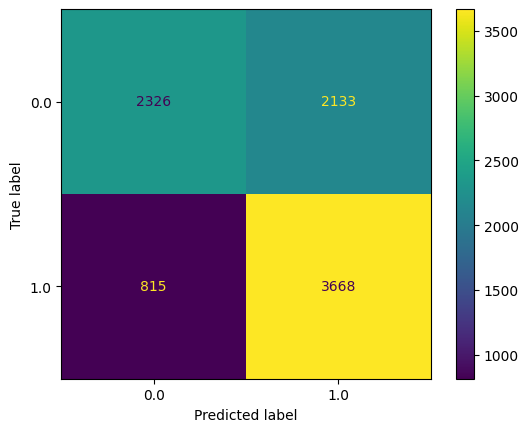

In [118]:
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

log_disp.plot()

plt.show()

In [119]:
(3758+2044) / (3758 + 725 + 2044 + 2415)

0.6488481324088571


The upper-left quadrant displays the number of true negatives: the number of videos posted by unverified accounts that the model accurately classified as so.

The upper-right quadrant displays the number of false positives: the number of videos posted by unverified accounts that the model misclassified as posted by verified accounts.

The lower-left quadrant displays the number of false negatives: the number of videos posted by verified accounts that the model misclassified as posted by unverified accounts.

The lower-right quadrant displays the number of true positives: the number of videos posted by verified accounts that the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [120]:
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.52      0.61      4459
not verified       0.63      0.82      0.71      4483

    accuracy                           0.67      8942
   macro avg       0.69      0.67      0.66      8942
weighted avg       0.69      0.67      0.66      8942



The classification report above shows that the logistic regression model achieved a precision of 61% and a recall of 84%, and it achieved an accuracy of 65%.

### **Task 4c. Interpret model coefficients**

In [121]:
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,-2.453771e-03
1,video_view_count,-1.688503e-07
2,video_share_count,4.826054e-06
3,video_download_count,-8.108573e-05
4,video_comment_count,4.482830e-04
5,claim_status_opinion,1.702599e+00
6,author_ban_status_banned,-4.484328e-01
7,author_ban_status_under review,-9.866803e-02


### Conclusion



- The dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. We decided to drop `video_like_count` from the model building.
- Based on the logistic regression model, each additional second of the video is associated with 0.009 increase in the log-odds of the user having a verified status.
- The logistic regression model had not great, but acceptable predictive power: a precision of 61% is less than ideal, but a recall of 84% is very good. Overall accuracy is towards the lower end of what would typically be considered acceptable. 


In this project, we explored a dataset of TikTok videos and users with the goal of predicting whether an account is verified. Through exploratory data analysis (EDA), we identified key issues such as missing values, severe skewness in engagement metrics, and strong multicollinearity between views and likes. After applying appropriate preprocessing steps—log transformation, one-hot encoding of categorical variables, and class balancing—we built and evaluated a logistic regression model.

Our results showed that engagement metrics such as views, shares, downloads, and comments are important predictors of verified status, while video_like_count was excluded to reduce multicollinearity. The model highlighted distinct behavioral patterns of verified accounts compared to non-verified accounts.

From a business perspective, these insights matter because verified users are more likely to post opinions than claims. By prioritizing reported content from verified accounts, TikTok can optimize moderation resources, reduce backlog, and increase user trust by ensuring that the most visible and potentially influential content is reviewed first.

Overall, this project demonstrates how data science and machine learning can directly support content moderation strategies on social media platforms. Future work could expand the model to directly classify claim vs. opinion, integrate natural language processing on video transcripts, and explore more advanced models such as ensemble methods or transformers for deeper insights.